Followed https://www.youtube.com/watch?v=QIUxPv5PJOY&t=215s

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas_datareader as web
from datetime import date
from datetime import datetime, timedelta, date

In [3]:
#get stock quote
year_ago = str(date.today()-timedelta(days=365))
today = str(date.today())
ticker = 'FIVG'
source = 'yahoo'
df = web.DataReader(ticker, data_source = source, start = year_ago, end = today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-28,37.977001,37.757999,37.757999,37.880001,156000.0,37.303871
2021-06-29,38.080002,37.859001,37.910000,38.020000,103800.0,37.441746
2021-06-30,38.090000,37.919998,38.029999,38.049999,188500.0,37.471287
2021-07-01,38.049999,37.820000,38.049999,37.950001,81100.0,37.372807
2021-07-02,38.169998,37.939999,38.110001,38.110001,68600.0,37.530376
...,...,...,...,...,...,...
2022-06-22,32.029999,31.389999,31.389999,31.740000,98700.0,31.740000
2022-06-23,32.000000,31.570000,31.870001,31.969999,63500.0,31.969999
2022-06-24,32.790001,32.240002,32.240002,32.779999,54100.0,32.779999


In [4]:
#get number of rows and columns
df.shape

(253, 6)

Text(0, 0.5, 'Price')

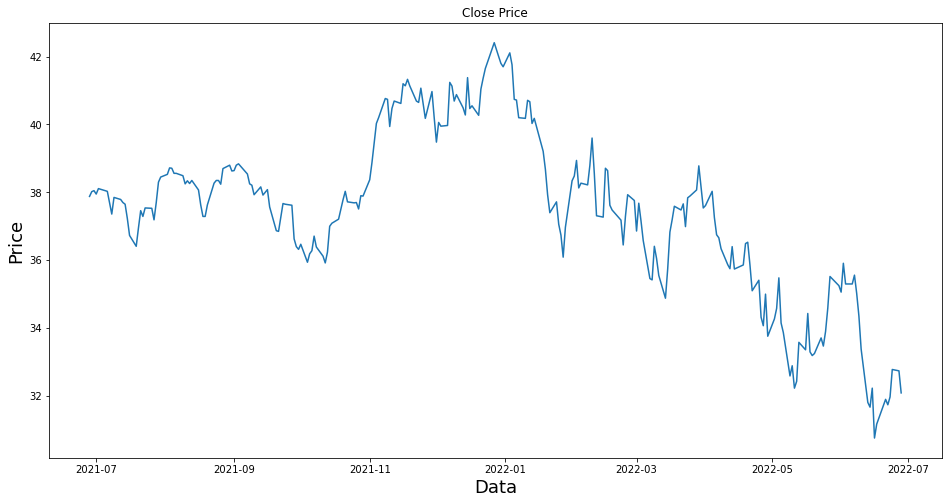

In [5]:
#visualize
plt.figure(figsize =(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [6]:
import math
#create new dataframe with only close
data = df.filter(['Close'])
#convert dataframe in numpy array
dataset = data.values
#get number of rows to train our model on
training_data_len = math.ceil(len(data)*.8)

In [7]:
training_data_len


203

In [8]:
#scale data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.61115889],
       [0.62317601],
       [0.62575101],
       [0.61716745],
       [0.63090134],
       [0.62403423],
       [0.59570822],
       [0.56652366],
       [0.60858356],
       [0.60343356],
       [0.59570822],
       [0.59141644],
       [0.55536477],
       [0.51244631],
       [0.48497852],
       [0.53133054],
       [0.57510722],
       [0.5605151 ],
       [0.58197433],
       [0.58111577],
       [0.55193121],
       [0.59570822],
       [0.64721024],
       [0.6600859 ],
       [0.66695269],
       [0.68326191],
       [0.68240336],
       [0.66952802],
       [0.66952802],
       [0.66351946],
       [0.64291846],
       [0.65064379],
       [0.64377668],
       [0.65150202],
       [0.62746779],
       [0.58969966],
       [0.5605151 ],
       [0.5605151 ],
       [0.58969966],
       [0.64463523],
       [0.65150202],
       [0.65150202],
       [0.64206023],
       [0.68154513],
       [0.69012869],
       [0.67553657],
       [0.6763948 ],
       [0.690

In [9]:
#create the training dataset
#create scaled data
train_data = scaled_data[0:training_data_len, :]
#split data into X_train and y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(X_train)
        print(y_train)
        print()

[array([0.61115889, 0.62317601, 0.62575101, 0.61716745, 0.63090134,
       0.62403423, 0.59570822, 0.56652366, 0.60858356, 0.60343356,
       0.59570822, 0.59141644, 0.55536477, 0.51244631, 0.48497852,
       0.53133054, 0.57510722, 0.5605151 , 0.58197433, 0.58111577,
       0.55193121, 0.59570822, 0.64721024, 0.6600859 , 0.66695269,
       0.68326191, 0.68240336, 0.66952802, 0.66952802, 0.66351946,
       0.64291846, 0.65064379, 0.64377668, 0.65150202, 0.62746779,
       0.58969966, 0.5605151 , 0.5605151 , 0.58969966, 0.64463523,
       0.65150202, 0.65150202, 0.64206023, 0.68154513, 0.69012869,
       0.67553657, 0.6763948 , 0.69012869, 0.69356225, 0.66781124,
       0.64291846, 0.6394849 , 0.61545067, 0.63519312, 0.61459212,
       0.62145923, 0.62832634, 0.58454933, 0.52446343, 0.52274665])]
[0.5579397687114591]

[array([0.61115889, 0.62317601, 0.62575101, 0.61716745, 0.63090134,
       0.62403423, 0.59570822, 0.56652366, 0.60858356, 0.60343356,
       0.59570822, 0.59141644, 0.555

In [10]:
#convert x_train and Y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
#reshape x_train
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))

In [12]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False ))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#compile model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
#train model
model.fit(X_train, y_train, batch_size = 1, epochs = 1)

143/143 [==============================] - 7s 24ms/step - loss: 0.0243


In [15]:
#create testing dataset
test_data = scaled_data[training_data_len-60: , :]
#create x_test, y_test
X_test =[]
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [16]:
#convert data to a numpy array
X_test = np.array(X_test)

In [17]:
#reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [18]:
#get models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 1s 11ms/step


In [19]:
#getting the root mean squared error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.369342155456543

C:\Users\jyama\AppData\Local\Temp/ipykernel_11744/1207603549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


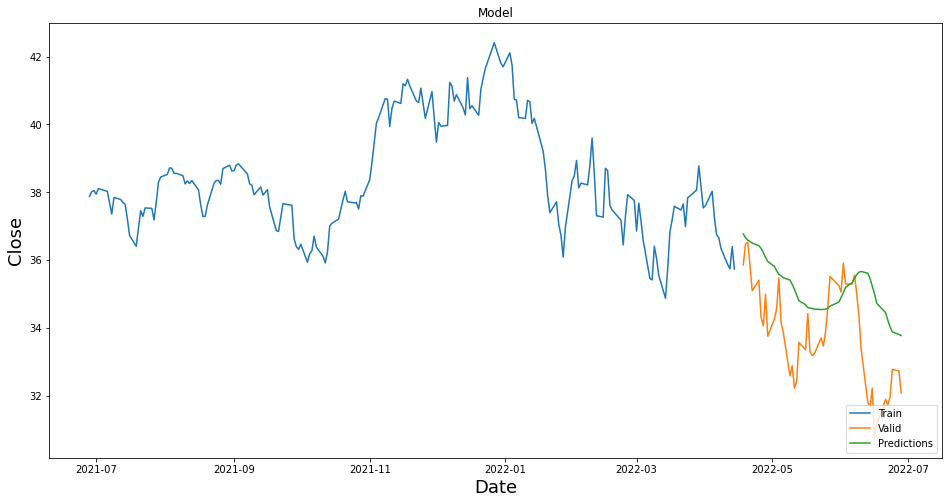

In [20]:
#plot data
train= data[0:training_data_len]
valid = data[training_data_len :]
valid['Predictions'] = predictions

#visualize
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')

In [21]:
#show the valid acutal price vs predicted
valid

,Close,Predictions
Date,,
2022-04-18,35.860001,36.773876
2022-04-19,36.490002,36.664551
2022-04-20,36.529999,36.593128
2022-04-21,35.860001,36.551453
2022-04-22,35.099998,36.504852
2022-04-25,35.410000,36.428082
2022-04-26,34.320000,36.349216
2022-04-27,34.070000,36.229752
2022-04-28,35.000000,36.082130


In [22]:
valid = pd.DataFrame(valid['Predictions'])
valid

,Predictions
Date,
2022-04-18,36.773876
2022-04-19,36.664551
2022-04-20,36.593128
2022-04-21,36.551453
2022-04-22,36.504852
2022-04-25,36.428082
2022-04-26,36.349216
2022-04-27,36.229752
2022-04-28,36.082130
